In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [660]:
df = pd.read_csv('C:/Users/GC/Desktop/2021/연구/장기베스트셀러/데이터/Bestseller_Nonfiction.csv', encoding="cp949")

In [661]:
df

,BestsellerNonfic,Genre,GenreBin,Title,Author,Published Year,Publisher,Page,Price,authorgender(male0fe1team2),isFirstBestSeller,Duration,변경전Duration,변경후Duration3(0=S1=L2=etc),Impact,year_rank,isGlobal50 of first year(False=0True=1)
0,2020,Religion&Spirituality,0,The Four Agreements: A Practical Guide to…,Don Miguel Ruiz,1997,Amber-Allen Publishing Incorporated,160,6.48,0,0,9,1,1,2.255000e+05,2019_20,0
1,2020,Religion&Spirituality,0,The 5 Love Languages: The Secret to Love that…,Gary Chapman,2015,Northfield Publishing,208,17.99,0,0,10,1,1,1.558974e+05,2019_10,0
2,2020,Reference,0,Publication Manual of the American…,American Psychological Association,2019,American Psychological Association,428,26.70,2,0,10,1,1,2.300000e+08,2019_66,0
3,2020,Religion&Spirituality,0,The Alchemist 25th Anniversary: A Fable About…,Paulo Coelho,2003,HarperOne,208,25.99,0,0,6,1,1,9.876020e+06,2019_65,1
4,2020,Religion&Spirituality,0,The Gifts of Imperfection: Let Go of Who You…,Bren? Brown,2012,Brilliance Audio,160,16.95,1,1,8,1,1,1.087900e+05,2019_60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2012,History,7,Behind the Beautiful Forevers: Life Death and…,Katherine Boo,2014,Random House Trade Paperbacks,288,17.99,1,1,1,0,0,2.272204e+04,NaN,1
258,2012,History,7,The Passage of Power: The Years of Lyndon…,Robert A. Caro,2012,Vintage,768,18.95,0,0,1,0,0,2.490000e+05,NaN,1
259,2011,Politics&SocialSciences,7,Boomerang: Travels in the New Third World,Michael Lewis,2011,W. W. Norton & Company,224,16.95,0,0,1,0,0,1.007487e+07,NaN,0
260,2011,Politics&SocialSciences,7,The Social Animal: The Hidden Sources of Love…,David Brooks,2011,Random Hous,468,18.00,1,1,1,0,0,4.995802e+05,NaN,1


In [662]:
df_x = df[['Published Year', 'Page', 'Price','authorgender(male0fe1team2)', 'isFirstBestSeller','Impact', 'isGlobal50 of first year(False=0True=1)']]
df_y = df['변경후Duration3(0=S1=L2=etc)']

In [907]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state = 100)

In [908]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [909]:
from sklearn.neighbors import KNeighborsClassifier

In [927]:
#kNN = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
cov = np.cov(x_test, rowvar=False)
kNN = KNeighborsClassifier(algorithm='brute', n_neighbors = 11, metric = 'mahalanobis', metric_params=dict(V=cov))

In [928]:
kNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='mahalanobis',
                     metric_params={'V': array([[ 0.50927327,  0.09260139, -0.062264  ,  0.04356789,  0.22910679,
        -0.00592223, -0.0901568 ],
       [ 0.09260139,  0.58003738,  0.84755968, -0.00957186, -0.04893579,
        -0.00468647,  0.11046128],
       [-0.062264  ,  0.84755968,  3.4064701 ,  0.48792447,  0.07046294,
        -0.00602166, -0.23982511],
       [ 0.04356789, -0.00957186,  0.48792447,  1.0656935 ,  0.32079224,
         0.00524772, -0.21858727],
       [ 0.22910679, -0.04893579,  0.07046294,  0.32079224,  1.06938109,
        -0.00917344, -0.18424853],
       [-0.00592223, -0.00468647, -0.00602166,  0.00524772, -0.00917344,
         0.00650209, -0.00730799],
       [-0.0901568 ,  0.11046128, -0.23982511, -0.21858727, -0.18424853,
        -0.00730799,  0.71633912]])},
                     n_neighbors=11)

In [929]:
y_pred = kNN.predict(x_test)

C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


In [930]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [931]:
confusion_matrix(y_test, y_pred, labels = [1, 0])

array([[ 7, 13],
       [ 4, 29]], dtype=int64)

In [932]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])

In [933]:
conf_matrix

,pred_0,pred_1
true_0,29,4
true_1,13,7


In [934]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [935]:
kNN.predict_proba(x_valid)

C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


array([[0.81818182, 0.18181818],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.63636364, 0.36363636],
       [0.81818182, 0.18181818],
       [0.81818182, 0.18181818],
       [0.81818182, 0.18181818],
       [0.36363636, 0.63636364],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.72727273, 0.27272727],
       [0.90909091, 0.09090909],
       [0.81818182, 0.18181818],
       [0.54545455, 0.45454545],
       [0.72727273, 0.27272727],
       [0.81818182, 0.18181818],
       [0.45454545, 0.54545455],
       [0.54545455, 0.45454545],
       [0.81818182, 0.18181818],
       [0.45454545, 0.54545455],
       [0.63636364, 0.36363636],
       [0.81818182, 0.18181818],
       [0.54545455, 0.45454545],
       [0.63636364, 0.36363636],
       [0.90909091, 0.09090909],
       [0.63636364, 0.36363636],
       [0.45454545, 0.54545455],
       [0.45454545, 0.54545455],
       [0.81818182, 0.18181818],
       [0.81818182, 0.18181818],
       [0.

ROC AUC: 0.502


C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


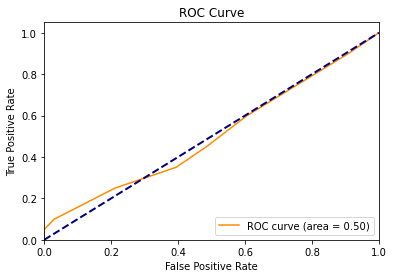

In [936]:
fpr, tpr, _ = roc_curve(y_valid, kNN.predict_proba(x_valid)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [937]:
fpr

array([0.        , 0.        , 0.03030303, 0.21212121, 0.39393939,
       0.48484848, 0.60606061, 0.90909091, 1.        ])

In [938]:
tpr

array([0.  , 0.05, 0.1 , 0.25, 0.35, 0.45, 0.6 , 0.9 , 1.  ])

In [939]:
predictions = kNN.predict(x_test)

C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "


In [940]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [941]:
print(f'Accuracy: {accuracy_score(y_valid, predictions):0.3f}')
print(f'Precision: {precision_score(y_valid, predictions):0.3f}')
print(f'Recall: {recall_score(y_valid, predictions):0.3f}')
print(f'f1: {f1_score(y_valid, predictions):0.3f}')

Accuracy: 0.679
Precision: 0.636
Recall: 0.350
f1: 0.452


In [942]:
print(kNN.score(x_train, y_train))

0.6411483253588517


In [943]:
print(kNN.score(x_test, y_test))

0.6792452830188679


C:\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
